## Logistic Regression Model Comparisons - Lab

## Introduction

In this lab, we will further investigate some comparisons between our personal logistic regression implementation, that of sci-kit learn and further tuning parameters that can be adjusted in the model.

## Objectives

* Understand and implement logistic regression
* Compare logistic model outputs

In the previous lab, we were able to recreat a logistic regression model output from sci-kit learn that did not include an intercept of regularization. Here, you will continue to analyze the impact of several tuning parameters including the intercept, and regularization parameter which we have not discussed previously.

## Importing the Data

As with the previous lab, import the dataset stored in **heart.csv**

In [1]:
#Your code here
import pandas as pd
df = pd.read_csv('heart.csv')
X = df[df.columns[:-1]]
y = df.target
print(y.value_counts())
X.head()

1.0    165
0.0    138
Name: target, dtype: int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667


## Problem Formulation

Define X and y as with the previous lab. This time, follow best practices and also implementk a standard train-test split.  
**For consistency of results, use random_state=17.**

In [2]:
from sklearn.model_selection import train_test_split

#Your code here
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 17)

## Initial Model - Personal Implementation

Use your code from the previous lab to once again train a logistic regression algorithm on the training set.

In [3]:
# Your code here
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\david\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Now use your algorithm to make [probability] predictions on the test set

In [8]:
#Your code here
y_hat_test = logreg.predict_proba(X_test)[:,1]
print(y_hat_test[0:10])

[0.88326396 0.18905337 0.152712   0.31661867 0.02384511 0.97241162
 0.29772718 0.85954119 0.04645761 0.72109625]


## Create an ROC curve for your predictions

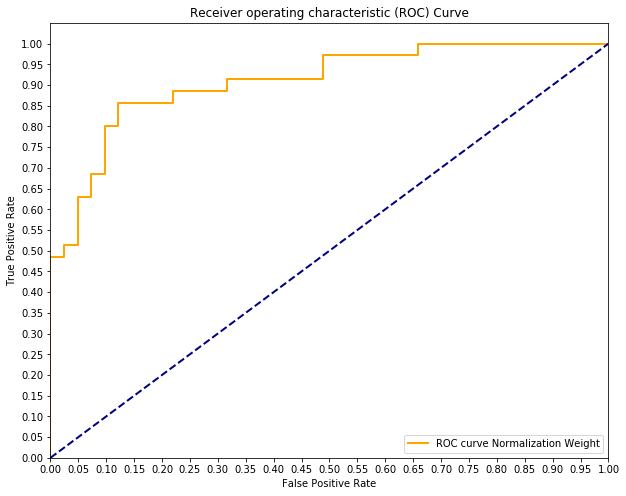

In [27]:
#Your code here
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_hat_test, pos_label=1)

plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, color='orange',
             lw=2, label='ROC curve Normalization Weight')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Update your ROC curve to not only include a graph of the test set, but one of the train set

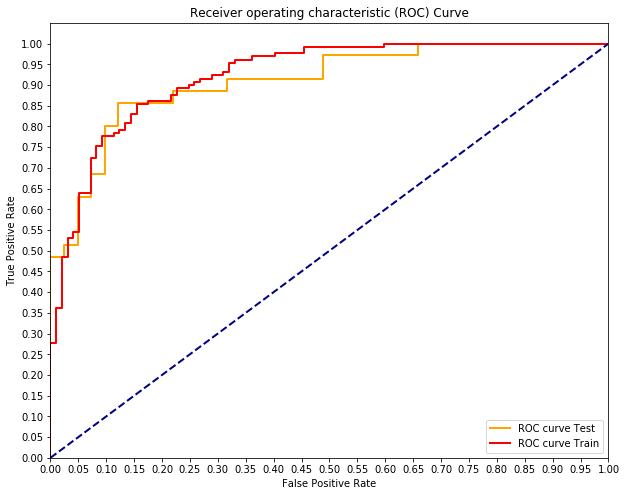

In [19]:
# Your code here
y_hat_train = logreg.predict_proba(X_train)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_hat_test, pos_label=1)
fpr_tr, tpr_tr, thresholds_tr = roc_curve(y_train, y_hat_train, pos_label=1)

plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, color='orange',
             lw=2, label='ROC curve Test')
plt.plot(fpr_tr, tpr_tr, color='red',
             lw=2, label='ROC curve Train')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Create a confusion matrix for your predictions

Use a standard decision boundary of .5 to convert your probabilities output by logistic regression into binary classifications. (Again this should be for the test set.) Afterwards, feel free to use the built in sci-kit learn methods to compute the confusion matrix as we discussed in previous sections.

In [24]:
# Your code here
import numpy as np
y_hat_test_class = np.array([round(x) for x in y_hat_test])
y_test_class = np.array([round(x) for x in y_test])
pd.crosstab(y_test_class, y_hat_test_class)

col_0,0.0,1.0
row_0,,
0,32,9
1,4,31


In [26]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test_class, y_hat_test_class)

array([[32,  9],
       [ 4, 31]], dtype=int64)

## Initial Model - sci-kit learn

Do the same using the built in method from sci-kit learn. To start, create an identical model as you did in the last section; turn off the intercept and set the regularization parameter, C, to a ridiculously large number such as 1e16. 

In [ ]:
# Your code here

## Create an ROC Curve for the sci-kit learn model

In [ ]:
#Your code here

## As before add an ROC curve to the graph for the train set as well

In [ ]:
#Your code here


## Adding an Intercept

Now add an intercept to the sci-kit learn model. Keep the regularization parameter C set to a very large number such as 1e16. Plot all three models ROC curves on the same graph.

In [ ]:
# Your code here

## Altering the Regularization Parameter

Now, experiment with altering the regularization parameter. At minimum, create 5 different subplots with varying regularization (C) parameters. For each, plot the ROC curve of the train and test set for that specific model.  

Regularization parameters between 1 and 20 are recommended. Observe the difference in test and train auc as you go along.

C:\Users\david\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


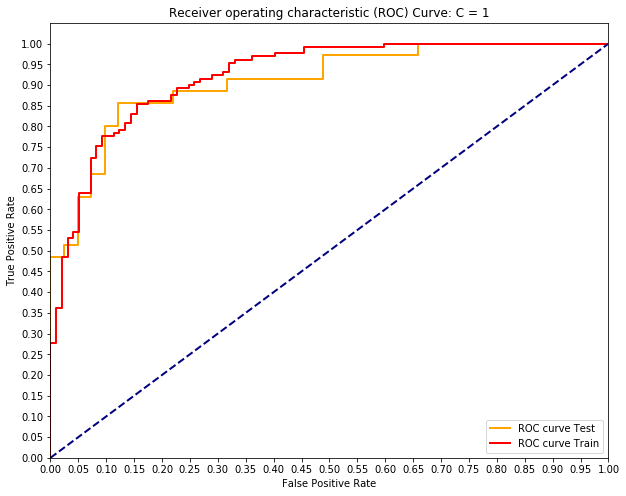

Test AUC: 0.909, Train AUC: 0.922, AUC Diff: 0.013


C:\Users\david\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


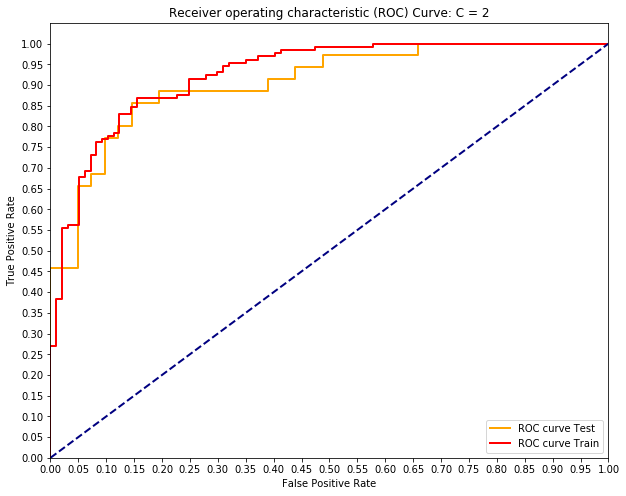

Test AUC: 0.906, Train AUC: 0.926, AUC Diff: 0.02


C:\Users\david\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


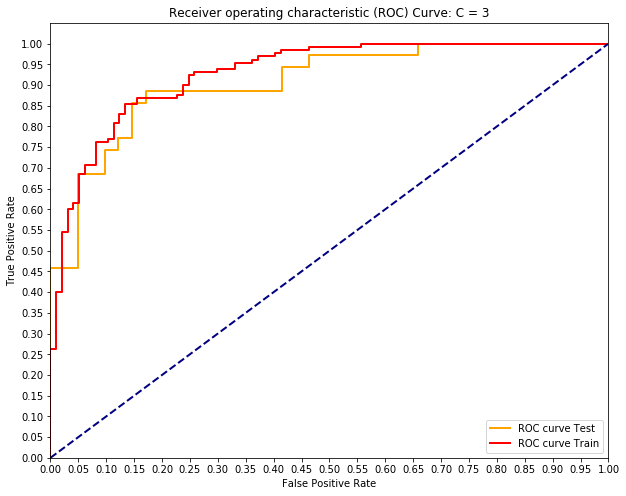

Test AUC: 0.907, Train AUC: 0.928, AUC Diff: 0.022


C:\Users\david\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


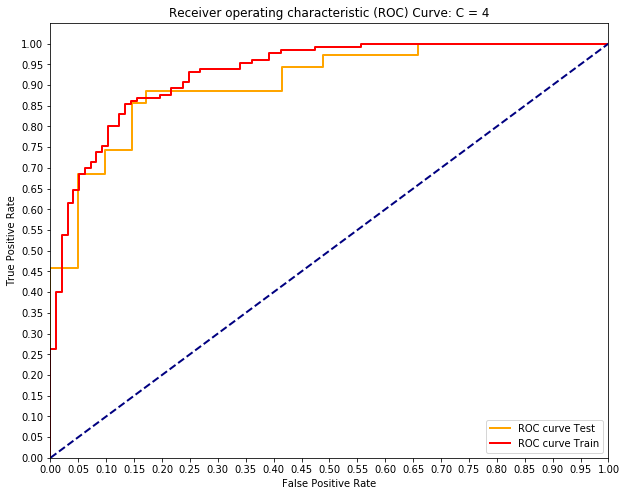

Test AUC: 0.905, Train AUC: 0.929, AUC Diff: 0.024


C:\Users\david\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


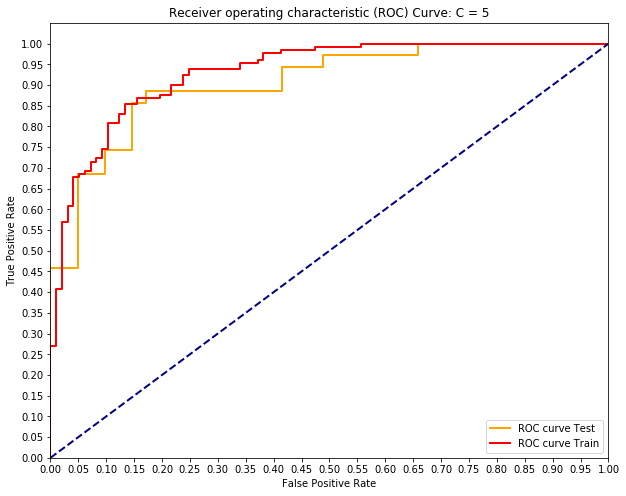

Test AUC: 0.905, Train AUC: 0.93, AUC Diff: 0.025


C:\Users\david\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


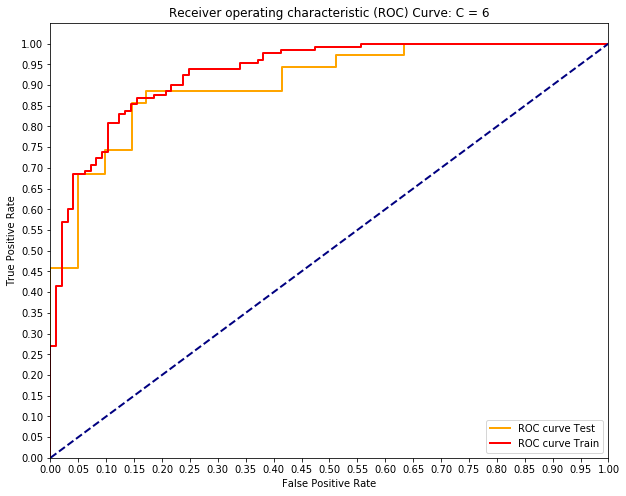

Test AUC: 0.905, Train AUC: 0.93, AUC Diff: 0.025


C:\Users\david\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


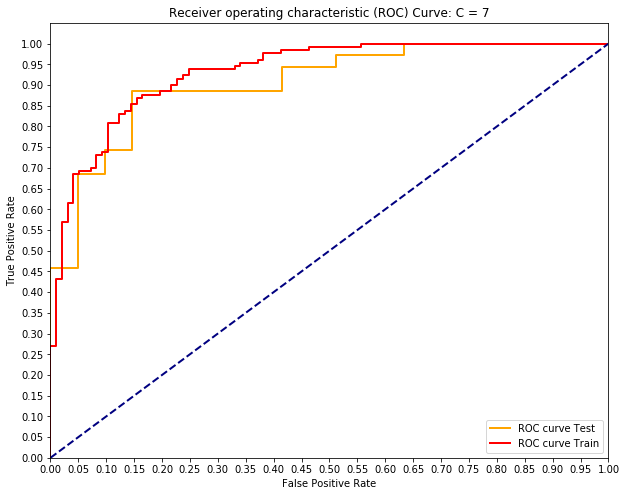

Test AUC: 0.906, Train AUC: 0.931, AUC Diff: 0.025


C:\Users\david\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


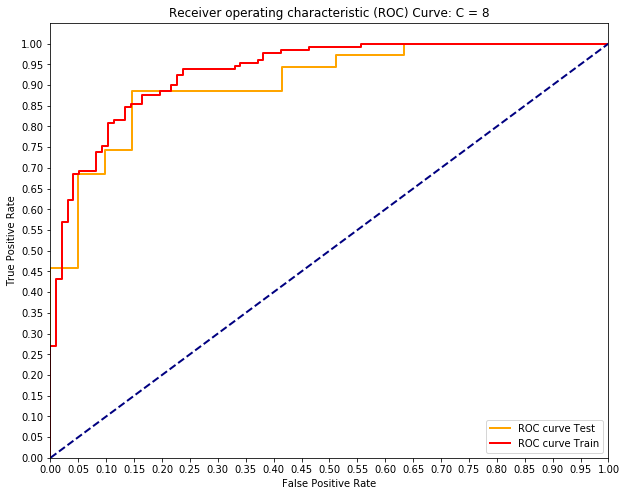

Test AUC: 0.906, Train AUC: 0.932, AUC Diff: 0.026


C:\Users\david\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


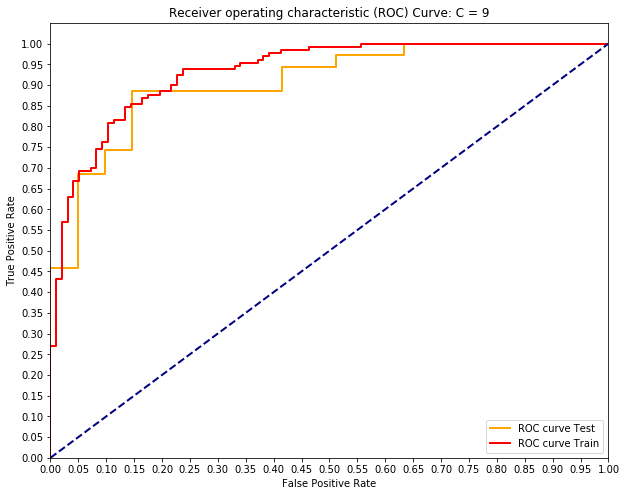

Test AUC: 0.906, Train AUC: 0.932, AUC Diff: 0.026


C:\Users\david\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


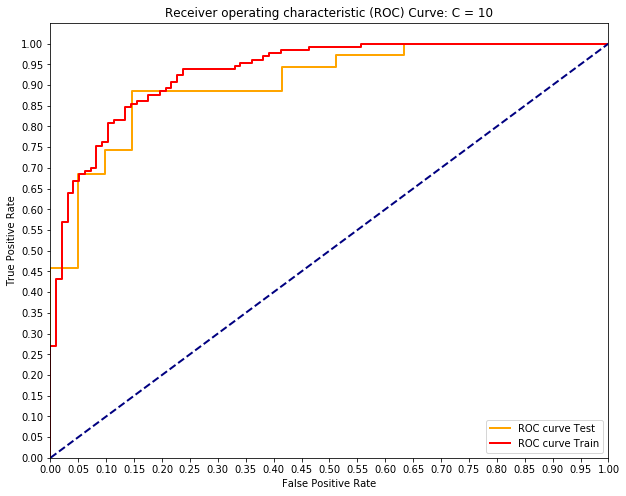

Test AUC: 0.906, Train AUC: 0.932, AUC Diff: 0.026


C:\Users\david\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


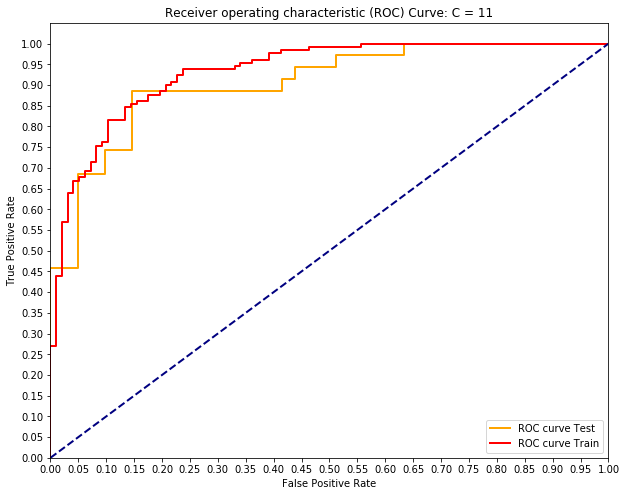

Test AUC: 0.905, Train AUC: 0.932, AUC Diff: 0.027


C:\Users\david\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


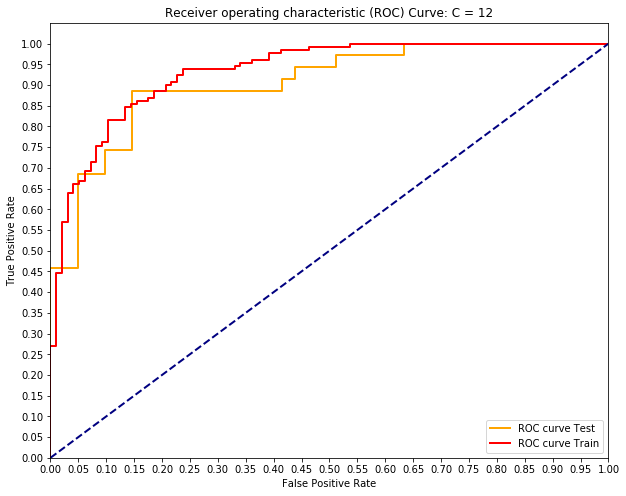

Test AUC: 0.905, Train AUC: 0.932, AUC Diff: 0.027


C:\Users\david\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


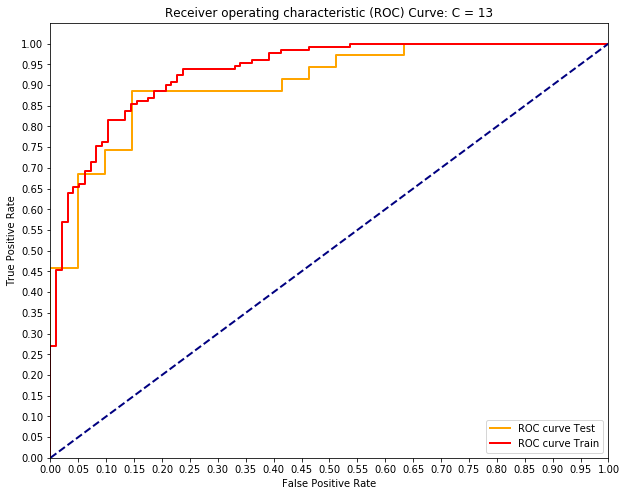

Test AUC: 0.905, Train AUC: 0.932, AUC Diff: 0.028


C:\Users\david\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


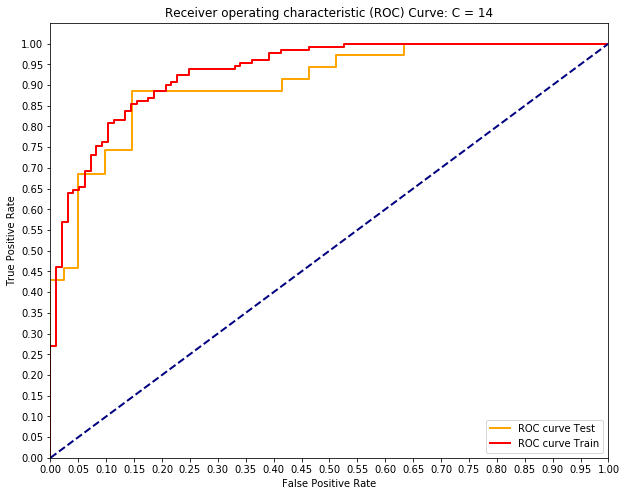

Test AUC: 0.904, Train AUC: 0.932, AUC Diff: 0.028


C:\Users\david\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


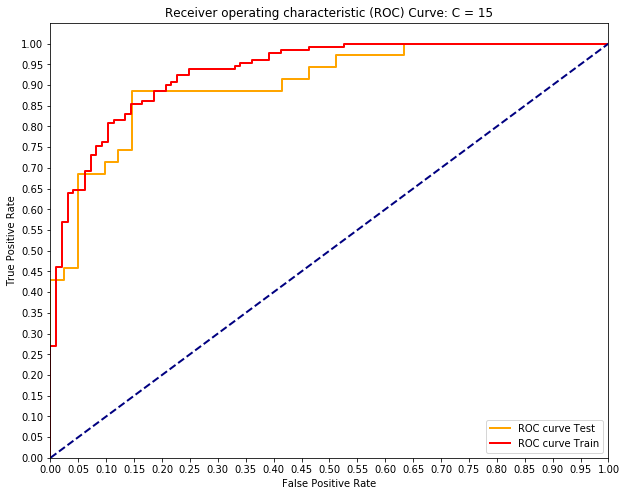

Test AUC: 0.903, Train AUC: 0.932, AUC Diff: 0.029


C:\Users\david\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


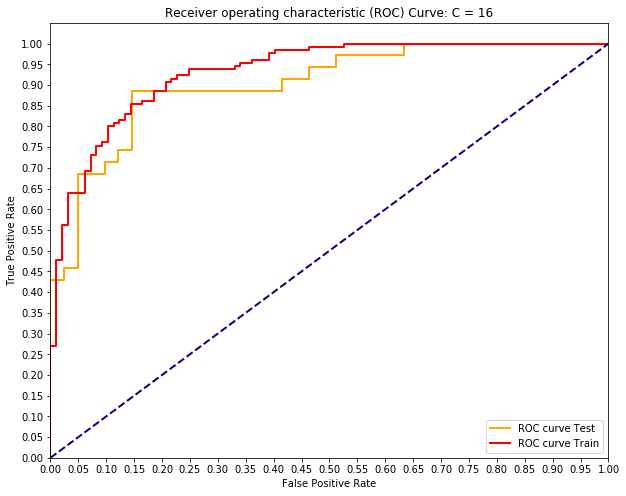

Test AUC: 0.903, Train AUC: 0.932, AUC Diff: 0.029


C:\Users\david\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


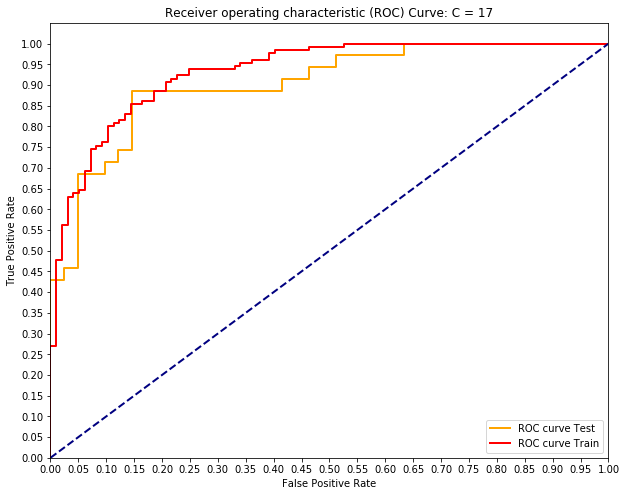

Test AUC: 0.903, Train AUC: 0.932, AUC Diff: 0.029


C:\Users\david\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


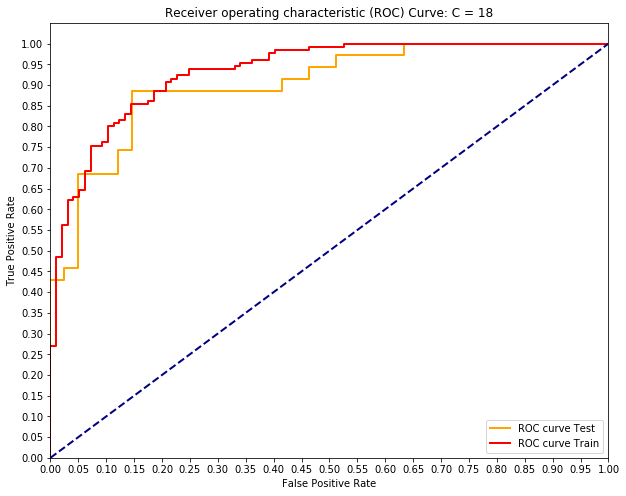

Test AUC: 0.902, Train AUC: 0.932, AUC Diff: 0.029


C:\Users\david\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


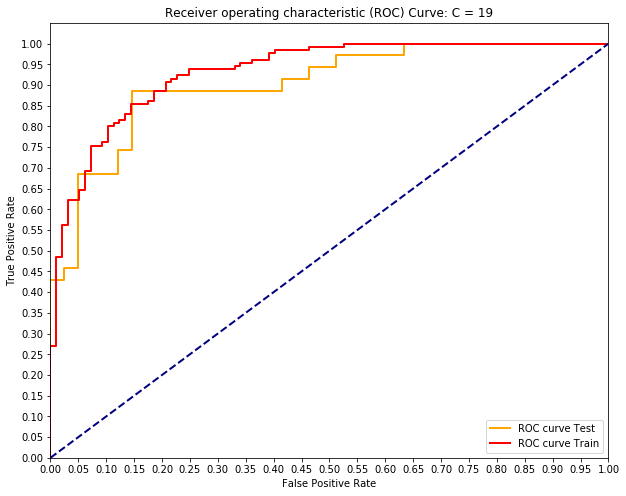

Test AUC: 0.902, Train AUC: 0.932, AUC Diff: 0.029


C:\Users\david\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


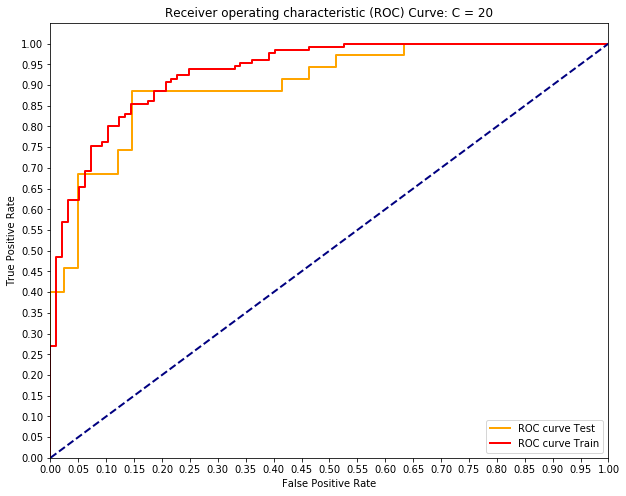

Test AUC: 0.902, Train AUC: 0.932, AUC Diff: 0.03


In [35]:
# Your code here
for c in range(1,21):
    logreg = LogisticRegression(C = c)
    logreg.fit(X_train, y_train)
    y_hat_test = logreg.predict_proba(X_test)[:,1]
    y_hat_train = logreg.predict_proba(X_train)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_hat_test, pos_label=1)
    fpr_tr, tpr_tr, thresholds_tr = roc_curve(y_train, y_hat_train, pos_label=1)

    plt.figure(figsize=(10,8))
    plt.plot(fpr, tpr, color='orange',
             lw=2, label='ROC curve Test')
    plt.plot(fpr_tr, tpr_tr, color='red',
             lw=2, label='ROC curve Train')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) Curve: C = {}'.format(c))
    plt.legend(loc="lower right")
    plt.show()
    auc_diff = auc(fpr_tr, tpr_tr) - auc(fpr, tpr)
    print('Test AUC: {}, Train AUC: {}, AUC Diff: {}'.format(round(auc(fpr, tpr),3), round(auc(fpr_tr, tpr_tr),3), round(auc_diff, 3)))

## Comment on how the Regularization Parameter Impacts the ROC curves plotted above

#Your response here

## Summary

In this lesson, we reviewed many of the accuracy measures of classification algorithms and observed the impact of additional tuning parameters such as regularization. In the final lessons of this section we will investigate one last method for visualizing our models which can be a useful tool for presenting your model outputs to a non-technical audience.
